In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")

In [ ]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df.shape

(37249, 2)

In [ ]:
df.sample()['clean_comment'].values

array(['can someone please explain why uma bharati important for the bjp she was vajpayee cabinet also and why smriti irani hrd such important portfolio and she very young and inexperienced '],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [ ]:
df[df["clean_comment"].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(350)

In [ ]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [ ]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [ ]:
df['clean_comment']= df['clean_comment'].str.lower()

df.head()

/tmp/ipython-input-16-1866771125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment']= df['clean_comment'].str.lower()


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
df['clean_comment'] = df['clean_comment'].str.strip()

In [ ]:
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [ ]:
url_pattern= r'https[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_url= df[df['clean_comment'].str.contains(url_pattern,regex=True)]
comments_with_url.head()

,clean_comment,category


In [ ]:
comments_with_newline= df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [ ]:
df['clean_comment']= df['clean_comment'].str.replace('\n',' ',regex=True)
comments_with_newline_remaining= df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining.head()

,clean_comment,category


Preprocessing is done now come for EDA

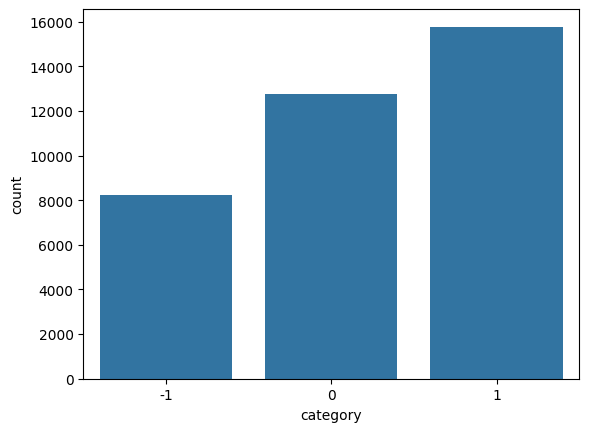

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x="category")
plt.show()

In [ ]:
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [ ]:
df['word_count']=df['clean_comment'].apply(lambda x: len(x.split()))
df.sample(5)

,clean_comment,category,word_count
21189,reminds 1930s germany same rhetoric against ce...,1,24
26576,you rather read something wholesome instead th...,1,128
23299,and thank you for doing this ama app uses the ...,1,46
7382,wow great stuff thanks,1,4
29096,war inevitable now more ceasefire violation an...,1,15


In [ ]:
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


In [ ]:
!pip install nltk

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


stop_words= set(stopwords.words('english'))
df['num_of_stopwords']= df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.sample(5)

,clean_comment,category,word_count,num_of_stopwords
5478,zuckerberg was like abe yaar internet zero liy...,0,13,1
11158,salman too proudy with bandage now,0,6,3
6265,hunches the bubble indian startups will burst ...,1,57,17
14377,you didn know they were hugging would say trum...,-1,12,5
28831,you are age where your will have your own thou...,1,77,42


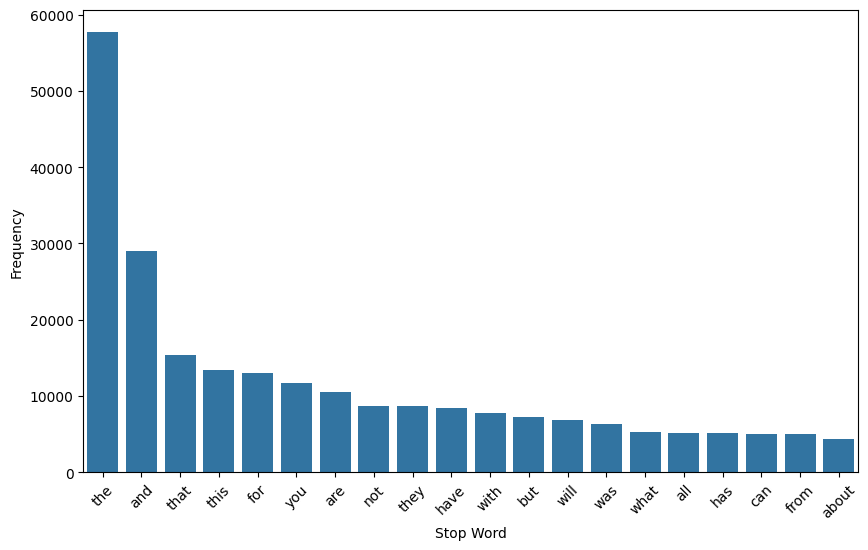

In [ ]:
from collections import Counter

all_stop_words= [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

most_common_stop_words= Counter(all_stop_words).most_common(20)
top_20_df= pd.DataFrame(most_common_stop_words,columns=['Stop Word','Frequency'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_20_df,x='Stop Word',y='Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['num_char']= df['clean_comment'].apply(lambda x: len(x))
df.sample(5)

,clean_comment,category,word_count,num_of_stopwords,num_char
36988,who runs the country then,0,5,3,25
34074,without this being defence the present governm...,1,52,19,339
28922,todays time anti national badge honor anti nat...,1,14,3,90
24978,here video sambit patra threatening rename mas...,0,10,2,67
8870,get them both tinder,0,4,2,20


In [ ]:
from collections import Counter

all_text= ' '.join(df['clean_comment'])
char_frequency= Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(),columns=['Character','Frequency']).sort_values(by='Frequency',ascending=False)

In [ ]:
char_frequency_df['Character'].values

array([' ', 'e', 't', ..., '呗', 'ഥ', '杨'], dtype=object)

In [ ]:
char_frequency_df.head(5)

,Character,Frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388


In [ ]:
df['num_punctuations_chars']= df['clean_comment'].apply(lambda x: sum(1 for char in x if char in '.,?!;:"\'()[]{}-'))
df.sample(5)

,clean_comment,category,word_count,num_of_stopwords,num_char,num_punctuations_chars
15304,this shit needs banned ideally all such banner...,1,19,4,111,0
5528,here something from the media,0,5,3,29,0
412,confirmed woman and this india 186 comments le...,1,20,3,110,0
2447,can also please get rid comments the lines whe...,1,16,4,99,0
35734,true congress the original majority appeasemen...,1,38,16,259,0


/tmp/ipython-input-46-2755438117.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df,x='Bigram',y='Count',palette='magma')


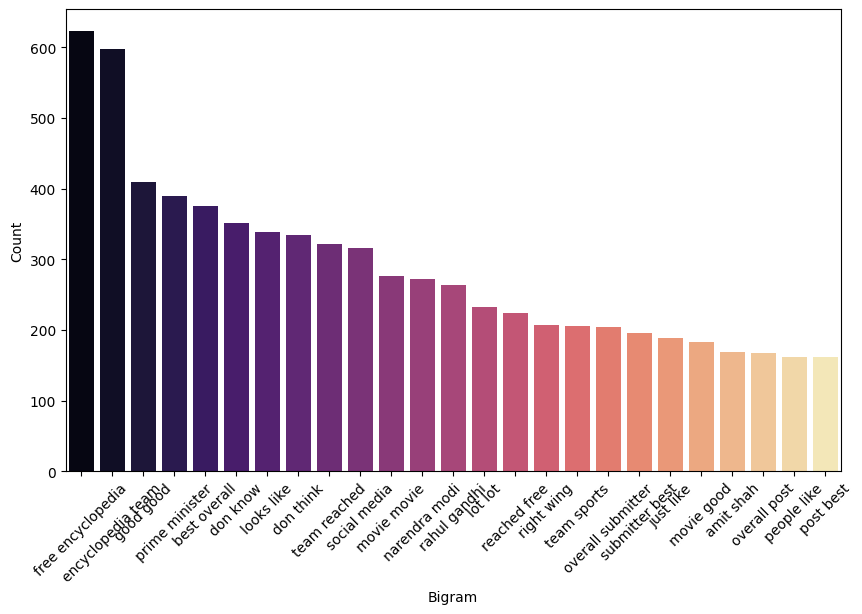

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus,n=None):
  vec= CountVectorizer(ngram_range=(2,2),stop_words='english').fit(corpus)
  bag_of_words= vec.transform(corpus)
  sum_words= bag_of_words.sum(axis=0)
  words_freq= [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq= sorted(words_freq,key=lambda x: x[1],reverse=True)
  return words_freq[:n]

top_25_bigrams = get_top_ngrams(df['clean_comment'],25)
top_25_bigrams_df = pd.DataFrame(top_25_bigrams,columns=['Bigram','Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_25_bigrams_df,x='Bigram',y='Count',palette='magma')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-57-3219750746.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df,x='Count',y='trigram',palette='coolwarm')


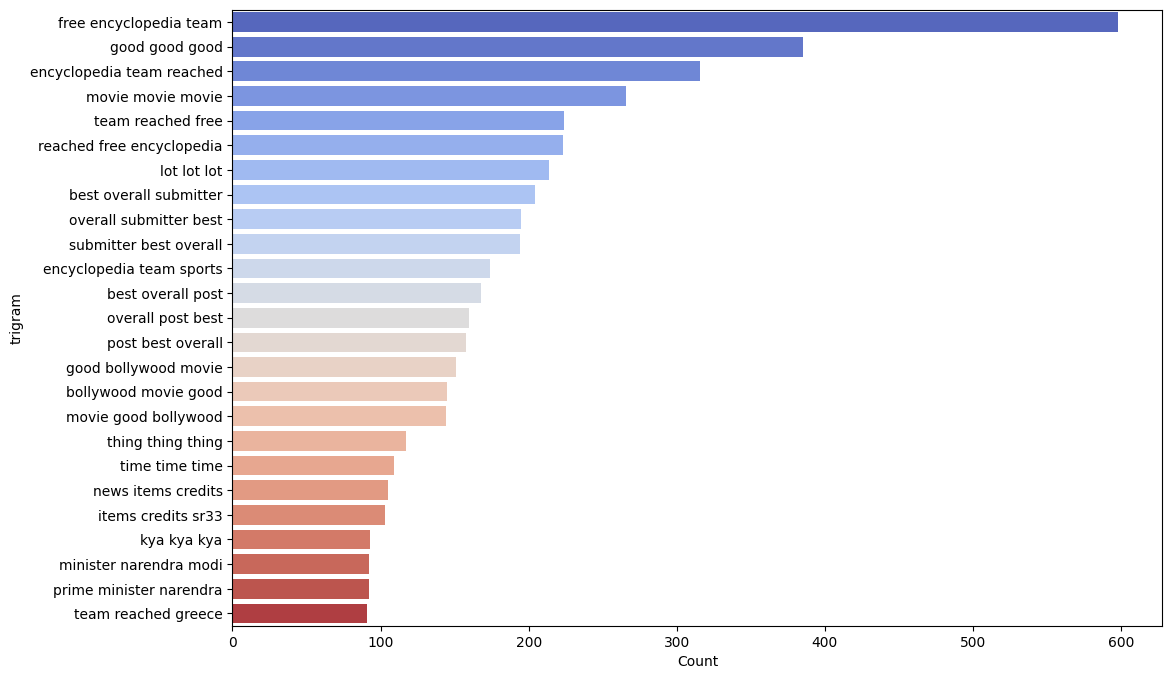

In [ ]:
def get_top_trigrams(corpus,n=None):
  vec= CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
  bag_of_words= vec.transform(corpus)
  sum_words= bag_of_words.sum(axis=0)
  words_freq= [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq= sorted(words_freq,key=lambda x: x[1],reverse=True)
  return words_freq[:n]

top_25_trigrams = get_top_trigrams(df['clean_comment'],25)
top_25_trigrams_df = pd.DataFrame(top_25_trigrams,columns=['trigram','Count'])

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_trigrams_df,x='Count',y='trigram',palette='coolwarm')
plt.show()

In [ ]:
import re
df['clean_comment']=df['clean_comment'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s!?.,]','',str(x)))

In [ ]:
all_text= ' '.join(df['clean_comment'])
char_frequency=Counter(all_text)
char_frequency_df= pd.DataFrame(char_frequency.items(),columns=['Character','Frequency']).sort_values(by='Frequency',ascending=False)
char_frequency_df

,Character,Frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [ ]:
from nltk.corpus import stopwords
stop_words= set(stopwords.words('english'))-{'not','no','but','however','yet'}

df['clean_comment']=df['clean_comment'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))

In [ ]:
df.head()

,clean_comment,category,word_count,num_of_stopwords,num_char,num_punctuations_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['clean_comment']=df['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.head()

,clean_comment,category,word_count,num_of_stopwords,num_char,num_punctuations_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


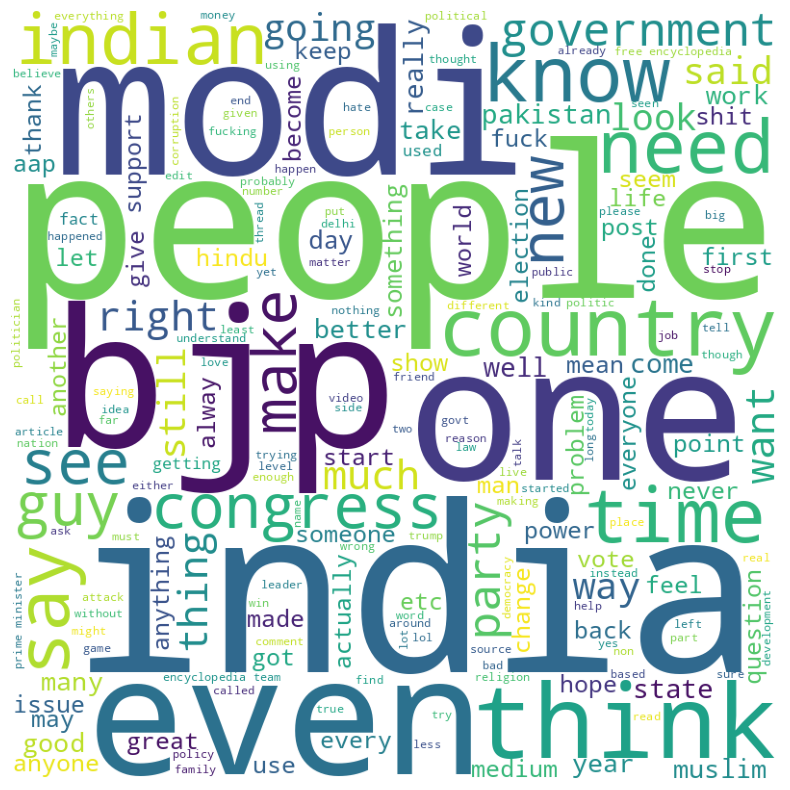

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text):
  wordcloud= WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate(' '.join(text))
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

plot_wordcloud(df['clean_comment'])

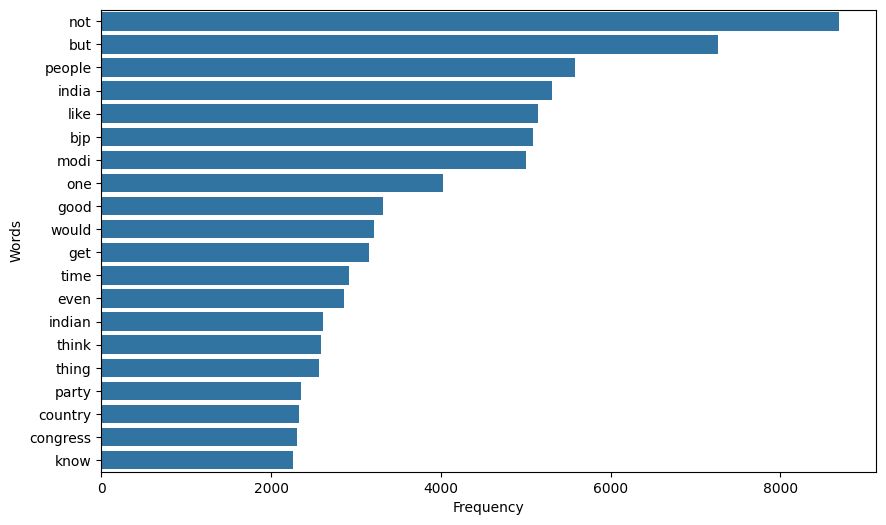

In [ ]:
def plot_top_n_words(df,n=20):
  words= ' '.join(df['clean_comment']).split()
  counter= Counter(words)
  most_common= counter.most_common(n)

#Split words and counts for plotting
  words,counts = zip(*most_common)

  plt.figure(figsize=(10,6))
  sns.barplot(x=list(counts),y=list(words))
  plt.xlabel('Frequency')
  plt.ylabel('Words')
  plt.show()

plot_top_n_words(df,n=20)

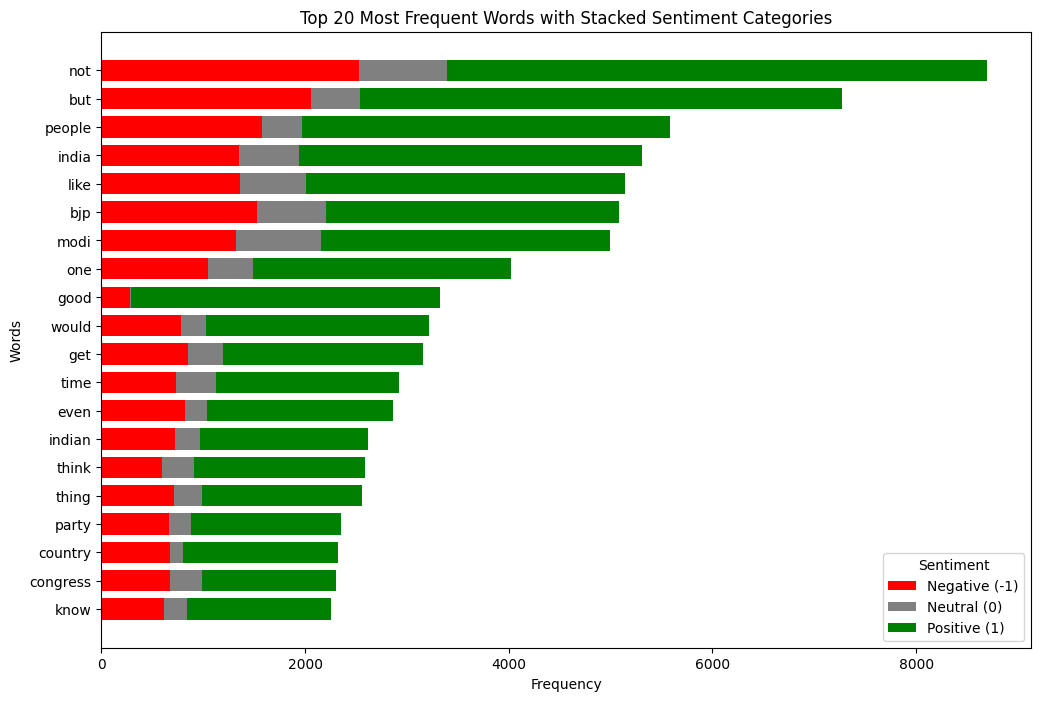

In [ ]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)
